In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/competitions/aptos2019-blindness-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sharmasanyam
Your Kaggle Key: ··········


100%|██████████| 9.51G/9.51G [05:01<00:00, 33.8MB/s]



Extracting archive ./aptos2019-blindness-detection/aptos2019-blindness-detection.zip to ./aptos2019-blindness-detection


In [4]:
import numpy as np 
import pandas as pd 
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [5]:
dataset = []
labels = []

In [6]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(224,224))
    img_array = img_to_array(img_res)
    img_array = img_array/255.0
    dataset.append(img_array)
    labels.append(str(label))

In [7]:
train_Data = pd.read_csv("aptos2019-blindness-detection/train.csv")
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [8]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [9]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('aptos2019-blindness-detection/train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

3662it [06:17,  9.70it/s]


In [10]:
images = np.array(dataset)
label_arr = np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.20,random_state=44)

In [12]:
x_train.shape

(2929, 224, 224, 3)

In [13]:
x_test.shape

(733, 224, 224, 3)

In [14]:
y_train.shape

(2929,)

In [15]:
y_test.shape

(733,)

In [16]:
y_train= np_utils.to_categorical(y_train, num_classes=5)
y_test = np_utils.to_categorical(y_test, num_classes=5)

In [17]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [18]:
import tensorflow
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)

Epoch 1/30
46/46 [==============================] - 19s 101ms/step - loss: 0.9812 - accuracy: 0.6501
Epoch 2/30
46/46 [==============================] - 4s 86ms/step - loss: 0.7796 - accuracy: 0.7129
Epoch 3/30
46/46 [==============================] - 4s 93ms/step - loss: 0.7387 - accuracy: 0.7306
Epoch 4/30
46/46 [==============================] - 4s 87ms/step - loss: 0.7161 - accuracy: 0.7409
Epoch 5/30
46/46 [==============================] - 4s 87ms/step - loss: 0.6806 - accuracy: 0.7405
Epoch 6/30
46/46 [==============================] - 4s 94ms/step - loss: 0.6643 - accuracy: 0.7600
Epoch 7/30
46/46 [==============================] - 4s 87ms/step - loss: 0.6368 - accuracy: 0.7620
Epoch 8/30
46/46 [==============================] - 4s 87ms/step - loss: 0.6041 - accuracy: 0.7784
Epoch 9/30
46/46 [==============================] - 4s 93ms/step - loss: 0.5600 - accuracy: 0.7934
Epoch 10/30
46/46 [==============================] - 4s 87ms/step - loss: 0.5309 - accuracy: 0.8068
Epoch 1

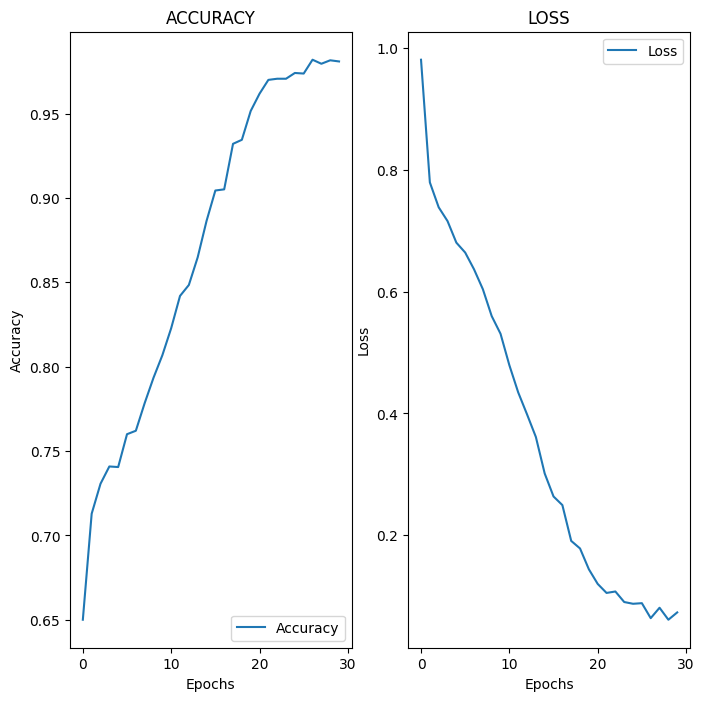

In [21]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']

loss = model.history.history['loss']
EPOCHS = 30

epochs_range = range(EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Accuracy')
plt.legend(loc='lower right')
plt.title('ACCURACY')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Loss')
plt.legend(loc='upper right')
plt.title('LOSS')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[343   8   9   1   0]
 [  9  27  26   3   9]
 [  7  17 139  18  19]
 [  1   2  14  17   5]
 [  0   6  22   5  26]]


Confusion matrix, without normalization
[[343   8   9   1   0]
 [  9  27  26   3   9]
 [  7  17 139  18  19]
 [  1   2  14  17   5]
 [  0   6  22   5  26]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

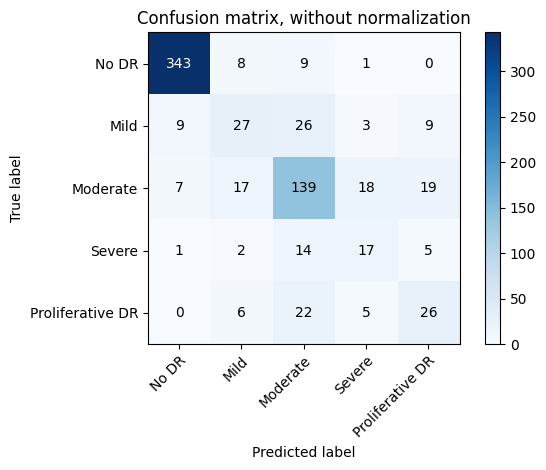

In [ ]:
Y_val_actual_hot = y_test.argmax(axis = 1)
Y_val_pred_hot = pred.argmax(axis = 1)
class_labels=["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
plot_confusion_matrix(Y_val_actual_hot, Y_val_pred_hot, np.array(class_labels))

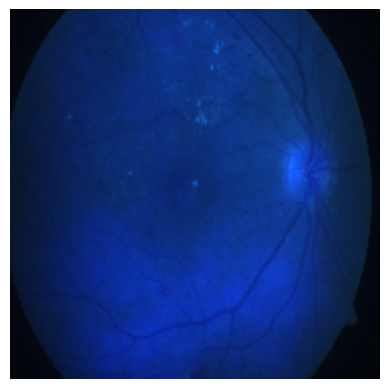

In [ ]:
plt.axis('off')
plt.imshow(x_train[0])

In [4]:
from keras.models import load_model
import numpy as np
# model.save('model_handmade.h5')

loaded_handmade_model = load_model('model_handmade.h5')

d = {0 : 'NoDR', 1 : 'Mild', 2 : 'Moderate', 3 : 'Severe', 4 : 'Proliferative'}

In [5]:
def predict_class(path, model):
    IMG_SIZE_LOAD = 224
    xtest = np.zeros((1, 224, 224, 3))
    image = cv2.imread(path)
    image = cv2.resize(image, (IMG_SIZE_LOAD, IMG_SIZE_LOAD))
    x_test_array = tf.keras.preprocessing.image.img_to_array(image)
    xtest[0] = x_test_array
    xtest = xtest / 255.0
    preds = model.predict(xtest)
    print(preds)
    l = preds[0]
    ind = np.where(l == max(l))[0][0]
    print(np.where(l == max(l))[0][0])
    print(d[ind])


In [7]:
import cv2
import tensorflow as tf

In [13]:
path = "D://Sanyam B.Tech//SANYAM SIXTH SEM//DR Dataset and 2 models//aptos2019-blindness-detection//train_images//00a8624548a9.png"
predict_class(path, loaded_handmade_model)

1/1 [==============================] - 0s 63ms/step
[[9.9383505e-12 1.6989256e-08 9.9834144e-01 1.6000334e-03 5.8547299e-05]]
2
Moderate
